## Introducing ```numpy``` and arrays

To begin processing image data, we need to understand what's going on behind the scenes.

We can do that using a library called ```numpy```, which stands for __Numerical Python__. 

In general, you should use this library when you want to do fancy mathemtical operations with numbers, especially if you have arrays or matrices.

In [1]:
# tools for interacting with the operating system
import os

# scientific python tool for 
import numpy as np # creating an abbreviation to save keystrokes

In [6]:
filepath = os.path.join('/work/CDS-VIS/test_samples/sample-data-01.csv')

The expression ```numpy.loadtxt(...)``` is a function call that asks Python to run the function ```loadtxt``` which belongs to the ```numpy``` library. This dotted notation is used everywhere in Python: the thing that appears before the dot contains the thing that appears after.


```numpy.loadtxt``` has two parameters: the name of the file we want to read and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

__Assign to variable__

In [7]:
data = np.loadtxt(filepath, delimiter = ',')

In [8]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [9]:
print(type(data))

(60, 40)


__numpy.ndarray__ tells us that we are working with an N-dimensional array

In this case, it's 2-dimensional

In [12]:
print(data.shape)

(60, 40)


In [13]:
60 * 40 #2400 separate observations

2400

In [14]:
print(data.dtype) #float64, so commas in the numbers

float64


__Index__

Indexing is similar to lists and strings, but we need to inlcude both row and column

In [33]:
first_value = data[0,0]

In [34]:
first_value

0.0

__Question:__ What is the middle value of the array?

In [43]:
middle_value = data[29, 19]

In [44]:
print(f'the middle value is {middle_value}')

the middle value is 16.0


<img src="../../CDS-VIS/test_samples/python-zero-index.svg">

__Slice__

An index like [30, 20] selects a single element of an array, but we can select whole sections as well. 

For example, we can select the first ten columns of values for the first four rows like this:

In [52]:
data[0:4,0:10]

array([[0., 0., 1., 3., 1., 2., 4., 7., 8., 3.],
       [0., 1., 2., 1., 2., 1., 3., 2., 2., 6.],
       [0., 1., 1., 3., 3., 2., 6., 2., 5., 9.],
       [0., 0., 2., 0., 4., 2., 2., 1., 6., 7.]])

First ten columns, rows five-ten

[12, 15]

__Select only one row__

__Select only one column__

__Numpy functions__

In [53]:
np.mean(data)

6.14875

In [54]:
np.max(data)
np.min(data)

20.0

In [56]:
np.std(data)

4.613833197118566

How to access help...

In [61]:
help(np.max)

Help on function amax in module numpy:

amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Return the maximum of an array or maximum along an axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to operate.  By default, flattened input is
        used.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, the maximum is selected over multiple axes,
        instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternative output array in which to place the result.  Must
        be of the same shape and buffer length as the expected output.
        See :ref:`ufuncs-output-type` for more details.
    
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result

__Operation across rows__

In [ ]:
np.median(data, axis = 0)

"Average score per day"

__Operation along columns__

"Average score per patient"

<img src="../../CDS-VIS/test_samples/numpy-axes.png">

In [62]:
print(np.mean(data, axis = 1))

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


In [64]:
print(np.mean(data, axis = 1).shape)

(60,)


This is a good overview to show how things work wiht ```numpy```:

https://www.sharpsightlabs.com/blog/numpy-axes-explained/

## Basic image processing with OpenCV

We start by loading all of the modules we'll need for this class

In [65]:
# We need to incldue the home directory in our path, so we can read in our own module.
import sys
sys.path.append(os.path.join("..", "..", "CDS-VIS"))

In [66]:
# python framework for working with images
import cv2

# some utility functions for plotting images
from utils.imutils import jimshow

__Read image__

We can load an image using a handy function from OpenCV

In [67]:
filepath = os.path.join('..', '..', 'CDS-VIS', 'img', 'trex.png')

In [68]:
image = cv2.imread(filepath)

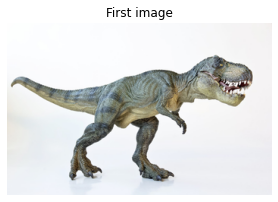

In [104]:
jimshow(image, 'First image')

__Save image__

In [73]:
outpath = filepath = os.path.join('..', '..', 'cds-visual', 'nbs', 'new_dino.png')

In [74]:
#cv2.imwrite(outpath, image)

True

In [75]:
print(type(image))

<class 'numpy.ndarray'>


__Inspect image__

In [76]:
print(image.shape) #we now have 3 values. 1. is height, 2. is width, 3. is color channel (3 channels; red, green, blue)
#the channels range from 0 to 255 (256 values). Pure white is (255, 255, 255).

(228, 350, 3)


array([254, 254, 254], dtype=uint8)

## What is an image?

__Remember how ```numpy``` arrays work!__

ROWSxCOLUMNS == HEIGHTxWIDTH

In [80]:
height, width = image.shape[0], image.shape[1]

In [83]:
print(height*width)

79800


In our image, there are 228*350 = 79,800 pixels

__What about the last one?__

In [88]:
print(image.shape[2])

3


<img src="../../CDS-VIS/test_samples/3-channels.png">

__NB!__

```OpenCV``` stores RGB tuples in REVERSE ORDER

__What colour is a specific pixel?__

In [94]:
image[0, 0] # always BGR in cv2, which is super uncommon and only done here. 
print(image[0,0])

array([254, 254, 254], dtype=uint8)

In [103]:
b, g, r = image[0,0]
print(f'first pixel at (0,0) - blue = {b}, green = {g}, red = {r}')

first pixel at (0,0) - blue = 0, green = 0, red = 255


__Modify colour__

In [101]:
image[0,0] = (0, 0, 255) #giving it a tuple. the first pixel is now red. NO WARNING BEFORE THIS HAPPENS!

In [ ]:
b, g, r = image[0,0]
print(f'first pixel at (0,0) - blue = {b}, green = {g}, red = {r}')

__Image slice__

In [106]:
corner = image[0:100,0:100]

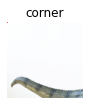

In [109]:
jimshow(corner, 'corner')

__Change corner colour__

In [110]:
image[0:100,0:100] = (0, 0, 255)

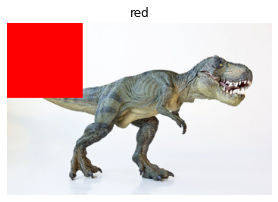

In [112]:
jimshow(image, 'red')